#**Extracción de datos**

In [1]:
import pandas as pd

In [2]:
# Cargamos los datos
url='https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

In [3]:
#Convertir los datos a un DataFrame de Pandas para facilitar su manipulación
datos=pd.read_json(url)
datos

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [4]:
# Normalizamos cada columna anidada
customer_df = pd.json_normalize(datos['customer'])
phone_df = pd.json_normalize(datos['phone'])
internet_df = pd.json_normalize(datos['internet'])
account_df = pd.json_normalize(datos['account'])

In [5]:
# Concatenamos con columnas que ya son planas
base_df = datos[['customerID', 'Churn']]
datos_final = pd.concat([base_df, customer_df, phone_df, internet_df, account_df], axis=1)
# Mostramos las primeras filas del resultado
datos_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [6]:
datos_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [7]:
#revisamos si hay valores ausentes
datos_final.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [8]:
# Revisamos duplicados
print("Filas duplicadas:", datos_final.duplicated().sum())
print("customerID duplicados:", datos_final['customerID'].duplicated().sum())

Filas duplicadas: 0
customerID duplicados: 0


In [9]:
#revisamos los tipos de datos
print(datos_final.dtypes)

customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total        object
dtype: object


In [10]:
#cambiamos la columna Charges.Total de objet a numerico (float64)
import numpy as np

In [11]:
# Eliminar espacios y convertir a número
datos_final['Charges.Total'] = pd.to_numeric(datos_final['Charges.Total'].astype(str).str.strip(), errors='coerce')

In [12]:
datos_final['Charges.Total']= datos_final['Charges.Total'].astype(np.float64)

In [13]:
#revisamos que la columna se haya convertido a numerica
print(datos_final.dtypes)

customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total       float64
dtype: object


In [14]:
datos_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


##Columna de Cuentas diarias
Ahora que los datos están limpios, es momento de crear la columna "Cuentas_Diarias". Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

In [15]:
# Suponiendo 30 días por mes
dias_promedio_mes = 30

# Crear la columna Cuentas_Diarias
datos_final['Cuentas_Diarias'] = datos_final['Charges.Monthly'] / dias_promedio_mes

In [16]:
#Verificamos que se a creado la nueva columna
datos_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


##Estandarización y transformación de datos

In [17]:
# Reemplazar "Yes"/"No" por 1/0 en todas las columnas categóricas tipo sí/no
cols_binarias = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling',
                 'Churn', 'MultipleLines', 'OnlineBackup', 'DeviceProtection',
                 'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in cols_binarias:
    datos_final[col] = datos_final[col].map({'Yes': 1, 'No': 0})

In [18]:
# Limpiar nombres: minúsculas, reemplazar espacios y puntos
datos_final.columns = datos_final.columns.str.lower().str.replace('.', '_').str.replace(' ', '_')

In [19]:
# Traducir valores en algunas columnas
datos_final['gender'] = datos_final['gender'].map({'Male': 'Hombre', 'Female': 'Mujer'})

# Renombrar algunas columnas
datos_final.rename(columns={
    'customerid': 'id_cliente',
    'churn': 'evasion',
    'gender': 'genero',
    'seniorcitizen': 'adulto_mayor',
    'partner': 'pareja',
    'dependents': 'dependientes',
    'phoneservice': 'servicio_telefonico',
    'multiplelines': 'multiples_lineas',
    'internetservice': 'servicio_internet',
    'onlinesecurity': 'seguridad_en_linea',
    'onlinebackup': 'respaldo_en_linea',
    'deviceprotection': 'proteccion_dispositivo',
    'techsupport': 'soporte_tecnico',
    'streamingtv': 'tv_streaming',
    'streamingmovies': 'peliculas_streaming',
    'contract': 'contrato',
    'paperlessbilling': 'facturacion_electronica',
    'paymentmethod': 'metodo_pago',
    'charges_monthly': 'cargos_mensuales',
    'charges_total': 'cargos_totales',
    'tenure': 'meses_servicio'
    }, inplace=True)

In [20]:
#Revisamos los cambios
datos_final.head()

,id_cliente,evasion,genero,adulto_mayor,pareja,dependientes,meses_servicio,servicio_telefonico,multiples_lineas,servicio_internet,...,proteccion_dispositivo,soporte_tecnico,tv_streaming,peliculas_streaming,contrato,facturacion_electronica,metodo_pago,cargos_mensuales,cargos_totales,cuentas_diarias
0,0002-ORFBO,0.0,Mujer,0,1,1,9,1,0.0,DSL,...,0.0,1.0,1.0,0.0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0.0,Hombre,0,0,0,9,1,1.0,DSL,...,0.0,0.0,0.0,1.0,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1.0,Hombre,0,0,0,4,1,0.0,Fiber optic,...,1.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1.0,Hombre,1,1,0,13,1,0.0,Fiber optic,...,1.0,0.0,1.0,1.0,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1.0,Mujer,1,1,0,3,1,0.0,Fiber optic,...,0.0,1.0,1.0,0.0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


## Analisis descriptivo

In [21]:
# Calcula las estadísticas descriptivas básicas para columnas numéricas
desc_stats = datos_final.describe()

# Calcula la mediana para cada columna numérica
medians = datos_final.median(numeric_only=True)

# Calcula la moda (valor más frecuente) de cada columna numérica
modes = datos_final.mode(numeric_only=True).iloc[0]

# Resultados
print("Resumen estadístico:")
print(desc_stats)

print("\nMedianas:")
print(medians)

print("\nModas:")
print(modes)


Resumen estadístico:
           evasion  adulto_mayor       pareja  dependientes  meses_servicio  \
count  7043.000000   7267.000000  7267.000000   7267.000000     7267.000000   
mean      0.265370      0.162653     0.484106      0.300124       32.346498   
std       0.441561      0.369074     0.499782      0.458343       24.571773   
min       0.000000      0.000000     0.000000      0.000000        0.000000   
25%       0.000000      0.000000     0.000000      0.000000        9.000000   
50%       0.000000      0.000000     0.000000      0.000000       29.000000   
75%       1.000000      0.000000     1.000000      1.000000       55.000000   
max       1.000000      1.000000     1.000000      1.000000       72.000000   

       servicio_telefonico  multiples_lineas  respaldo_en_linea  \
count          7267.000000       6560.000000        5686.000000   
mean              0.902711          0.467226           0.440380   
std               0.296371          0.498963           0.496476   

In [22]:
#Realizamos el analisis a las ultimas columnas revisando el promedio
grouped = datos_final.groupby('evasion')[['cargos_mensuales', 'cargos_totales', 'cuentas_diarias', 'meses_servicio']].mean()
# imprimimos el promedio
print("\nPromedios por grupo de evasion:")
print(grouped)


Promedios por grupo de evasion:
         cargos_mensuales  cargos_totales  cuentas_diarias  meses_servicio
evasion                                                                   
0.0             61.265124     2555.344141         2.042171       37.569965
1.0             74.441332     1531.796094         2.481378       17.979133


## Distribución de evasión

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

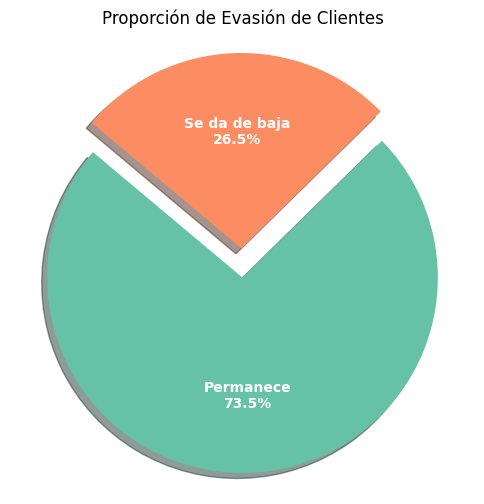

In [24]:
# Datos
conteo_evasion = datos_final['evasion'].value_counts()
labels = ['Permanece', 'Se da de baja']
colors = ['#66c2a5', '#fc8d62']
explode = (0.05, 0.1)

# Función personalizada para autopct (muestra etiqueta + %)
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        idx = int(round(pct * len(values) / 100.0))
        return '{:.1f}%'.format(pct)
    return my_autopct

# Crear gráfico
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    conteo_evasion,
    autopct=make_autopct(conteo_evasion),
    startangle=140,
    colors=colors,
    explode=explode,
    shadow=True,
    labels=None  # No usamos etiquetas externas
)

# Añadir etiquetas manualmente dentro de cada porción
for i, text in enumerate(autotexts):
    text.set_text(f'{labels[i]}\n{text.get_text()}')  # Agrega nombre + porcentaje
    text.set_color('white')  # Mejor contraste
    text.set_fontweight('bold')
    text.set_fontsize(10)

plt.title('Proporción de Evasión de Clientes')
plt.axis('equal')
plt.show()

## Análisis de Evasión por Variables Categóricas

### Gráfico de evasión por género

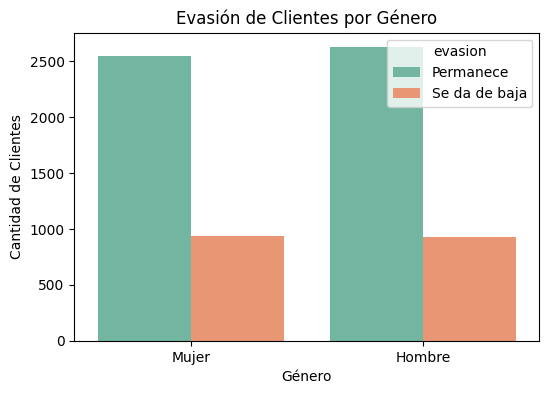

In [25]:
plt.figure(figsize=(6, 4))
sns.countplot(x='genero', hue='evasion', data=datos_final, palette='Set2')
plt.title('Evasión de Clientes por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='evasion', labels=['Permanece', 'Se da de baja'])
plt.show()


### Gráfico de evasión por tipo de contrato

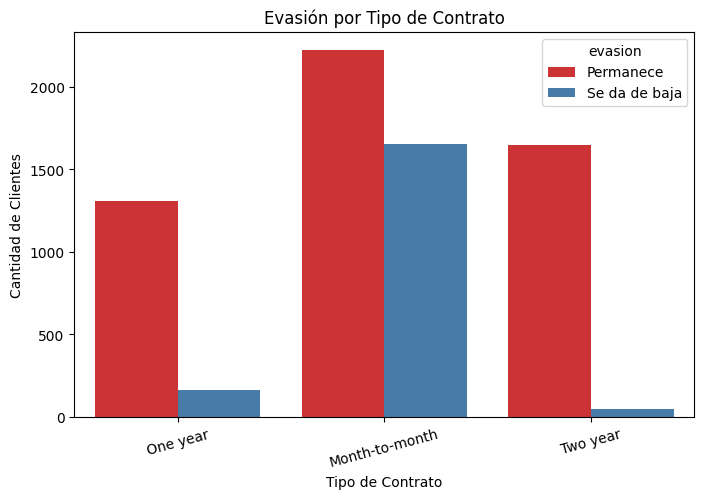

In [26]:
plt.figure(figsize=(8, 5))
sns.countplot(x='contrato', hue='evasion', data=datos_final, palette='Set1')
plt.title('Evasión por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='evasion', labels=['Permanece', 'Se da de baja'])
plt.xticks(rotation=15)
plt.show()


### Gráfico de evasión por método de pago

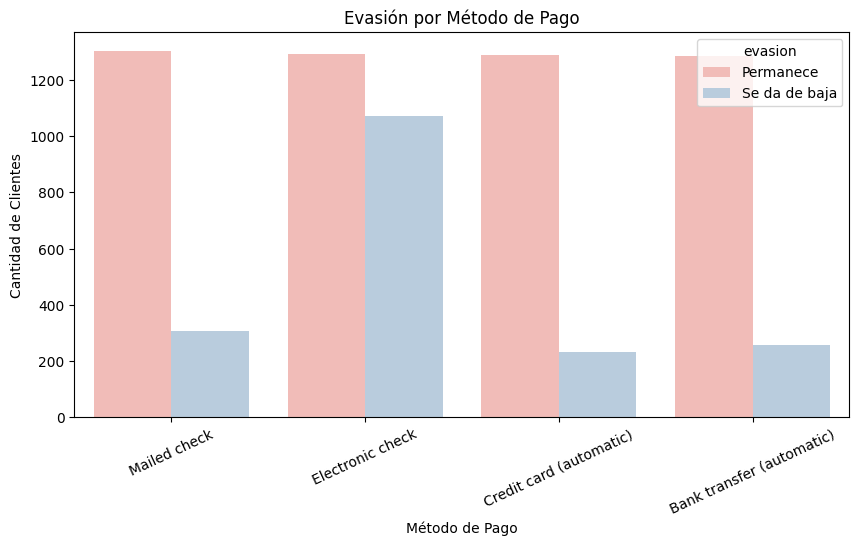

In [27]:
plt.figure(figsize=(10, 5))
sns.countplot(x='metodo_pago', hue='evasion', data=datos_final, palette='Pastel1')
plt.title('Evasión por Método de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='evasion', labels=['Permanece', 'Se da de baja'])
plt.xticks(rotation=25)
plt.show()


## Conteo de evasión por variables numéricas

In [28]:
# calculamos las metricas de media mediana y moda separadas porel valor de evasionlos que se quedaro y los que no
variables_numericas = ['cargos_totales', 'meses_servicio', 'cuentas_diarias']

# Media por evasión
media_por_evasion = datos_final.groupby('evasion')[variables_numericas].mean()

# Mediana por evasión
mediana_por_evasion = datos_final.groupby('evasion')[variables_numericas].median()

# Moda por evasión
moda_por_evasion = datos_final.groupby('evasion')[variables_numericas].agg(lambda x: x.mode().iloc[0])

# Resultados
print("Media por evasión:")
print(media_por_evasion)

print("\nMediana por evasión:")
print(mediana_por_evasion)

print("\nModa por evasión:")
print(moda_por_evasion)


Media por evasión:
         cargos_totales  meses_servicio  cuentas_diarias
evasion                                                 
0.0         2555.344141       37.569965         2.042171
1.0         1531.796094       17.979133         2.481378

Mediana por evasión:
         cargos_totales  meses_servicio  cuentas_diarias
evasion                                                 
0.0             1683.60            38.0           2.1475
1.0              703.55            10.0           2.6550

Moda por evasión:
         cargos_totales  meses_servicio  cuentas_diarias
evasion                                                 
0.0               19.75              72         0.668333
1.0               20.20               1         2.480000


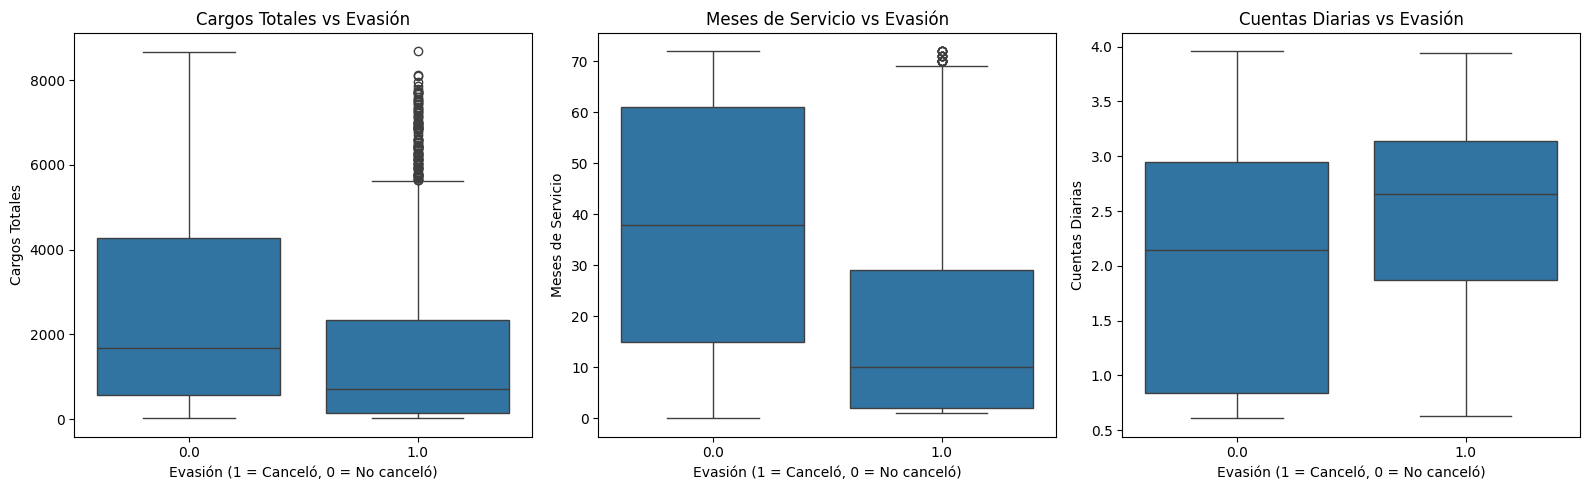

In [29]:
"""
graficamos las variables numéricas por evasión, para visualizar claramente las
diferencias entre los clientes que cancelaron y los que no cancelaron.
"""
# Variables numéricas que queremos comparar
variables_numericas = ['cargos_totales', 'meses_servicio', 'cuentas_diarias']

# Crear un subplot para cada variable
fig, axes = plt.subplots(1, len(variables_numericas), figsize=(16, 5))

# Títulos amigables
titulos = ['Cargos Totales', 'Meses de Servicio', 'Cuentas Diarias']

# Graficar cada variable
for i, var in enumerate(variables_numericas):
    sns.boxplot(data=datos_final, x='evasion', y=var, ax=axes[i])
    axes[i].set_title(f'{titulos[i]} vs Evasión')
    axes[i].set_xlabel('Evasión (1 = Canceló, 0 = No canceló)')
    axes[i].set_ylabel(titulos[i])

plt.tight_layout()
plt.show()


In [30]:
# elaboramos un histograma
variables = ['cargos_totales', 'meses_servicio', 'cuentas_diarias']

for var in variables:
    fig = px.histogram(
        datos_final,
        x=var,
        color='evasion',
        barmode='overlay',  # superpone para comparar
        histnorm='density',  # densidad para comparar formas
        nbins=30,
        title=f'Distribución de {var} por evasión',
        labels={var: var, 'evasion': 'Evasión (0=No, 1=Sí)'}
    )
    fig.update_traces(opacity=0.6)  # transparencia para mejor vista
    fig.show()


## **Informe Final**

###**1. Introducción**

En el presente análisis se aborda el problema de la evasión de clientes (churn) en la empresa de telecomunicaciones TelecomX. La evasión representa la pérdida de clientes que cancelan sus servicios, lo que afecta directamente los ingresos y la sostenibilidad del negocio. El objetivo principal de este estudio es identificar patrones y factores asociados a la evasión, para entender mejor el comportamiento de los clientes y apoyar la toma de decisiones estratégicas orientadas a mejorar la retención.

El análisis incluye la exploración de datos demográficos, características del servicio contratado, métodos de pago, así como variables relacionadas con el uso y la facturación. A partir de estos datos, se pretende obtener insights relevantes que permitan diseñar acciones concretas para reducir la tasa de evasión y fortalecer la relación con los clientes.

###**2. Limpieza y Tratamiento de Datos**

Para realizar un análisis fiable, se realizó un proceso riguroso de limpieza y preparación de los datos provenientes de un conjunto de información en formato JSON. A continuación, se describen los pasos principales:

*Carga y normalización de datos:*

Se importaron los datos desde una fuente externa en formato JSON. Las columnas anidadas correspondientes a información del cliente, teléfono, internet y cuenta fueron normalizadas para transformarlas en un DataFrame plano, facilitando su manipulación.

*Verificación de valores nulos y duplicados:*

Se revisó la existencia de datos faltantes y duplicados en el conjunto. No se encontraron valores nulos significativos ni registros duplicados, lo cual indica que el dataset está limpio en términos de integridad.

*Conversión de tipos de datos:*

Algunas columnas, como Charges.Total (cargos totales), inicialmente se encontraban como texto u objeto. Estas se convirtieron a tipo numérico (float64) para permitir cálculos estadísticos precisos.

*Creación de nuevas variables:*

Se generó una nueva columna llamada cuentas_diarias, calculada como el cociente entre los cargos mensuales y un promedio de 30 días, para representar el gasto diario promedio del cliente.

*Codificación de variables categóricas binarias:*

Las columnas que contenían valores tipo sí/no fueron transformadas a formato numérico (1 para "Yes", 0 para "No") para facilitar análisis estadísticos y modelamiento.

*Limpieza y estandarización de nombres de columnas:*

Se estandarizaron los nombres de las columnas a minúsculas, sin espacios ni caracteres especiales, y se tradujeron las etiquetas principales al español para mejor interpretación.

Este tratamiento asegura que los datos estén consistentes, completos y listos para el análisis exploratorio y la extracción de conclusiones.

###**3. Análisis Exploratorio de Datos (EDA)**
El análisis exploratorio de datos permitió identificar tendencias generales, relaciones entre variables y diferencias notables entre los clientes que permanecen y aquellos que cancelan el servicio.

####**3.1 Distribución general de la evasión**
Se generó un gráfico de pastel que mostró la proporción de clientes que permanecen versus los que se dan de baja. La mayoría de los clientes continúan con el servicio, aunque existe un porcentaje significativo que representa la evasión, lo que justifica la necesidad del análisis.

####**3.2 Estadísticas descriptivas**
Se calcularon la media, mediana y moda para las principales variables numéricas como:

cargos_totales (gasto acumulado del cliente)

meses_servicio (antigüedad del cliente en meses)

cuentas_diarias (gasto diario promedio)

También se analizaron estas métricas separadamente para los grupos de clientes que se quedaron y los que cancelaron, observando diferencias claras que permiten entender comportamientos distintos.

####**3.3 Análisis por variables numéricas**
Se utilizaron gráficos de boxplot y histogramas interactivos (Plotly) para comparar la distribución de las variables numéricas entre ambos grupos:

Los clientes que cancelaron tienden a tener menor antigüedad (menos meses de servicio).

También presentan un gasto total acumulado menor, lo que indica que la evasión ocurre más frecuentemente entre clientes nuevos.

La variable cuentas_diarias no mostró una diferencia muy marcada, por lo que su influencia directa en la evasión no es concluyente.

####**3.4 Análisis por variables categóricas**
Se analizaron varias variables categóricas importantes:

Género: No se observaron diferencias significativas en la evasión entre hombres y mujeres.

Tipo de contrato: La mayoría de los clientes que cancelan tienen contratos mensuales. En cambio, los contratos de uno o dos años están asociados a una mayor permanencia.

Método de pago: Los métodos automáticos, como tarjeta de crédito o débito automático, están relacionados con menor evasión. Por el contrario, métodos manuales como cheque por correo o cheque electrónico mostraron mayor tasa de cancelación.

Este análisis evidencia que tanto el tipo de contrato como el método de pago son factores relevantes que podrían estar influyendo en el comportamiento de cancelación del cliente.

###**4. Conclusiones e Insights**
A partir del análisis exploratorio realizado, se han identificado varios hallazgos relevantes sobre los factores que influyen en la evasión de clientes dentro del servicio de telecomunicaciones:

**Evasión temprana**

Los clientes que cancelan el servicio suelen tener una menor antigüedad, con un número significativamente más bajo de meses de servicio en comparación con los clientes que permanecen. Esto sugiere que los primeros meses de la relación con el cliente son críticos y requieren atención especial para evitar bajas tempranas.

**Relación con el gasto**

Los clientes que permanecen tienden a tener cargos totales acumulados más altos, lo cual es coherente con su mayor tiempo de permanencia. Estos clientes representan un valor más alto para la empresa, y su retención debe ser prioritaria.

**Tipo de contrato como factor determinante**

Los contratos mes a mes están fuertemente asociados con la evasión. En cambio, los contratos de uno o dos años muestran tasas mucho menores de cancelación. Esto indica que los compromisos a más largo plazo podrían mejorar la retención.

**Influencia del método de pago**

Los métodos de pago automáticos, como tarjeta de crédito o domiciliación bancaria, están relacionados con menores tasas de evasión. Los métodos más manuales, como cheques electrónicos o enviados por correo, tienden a mostrar más cancelaciones. Esto puede deberse a que los pagos automáticos disminuyen las barreras para continuar el servicio.

**Género no relevante**

El género no mostró una influencia significativa en la evasión. Tanto hombres como mujeres cancelan en proporciones similares, por lo que esta variable no representa un factor de segmentación prioritario.

En conjunto, estos insights permiten comprender mejor el perfil de los clientes que cancelan y aquellos que se mantienen, y proporcionan información útil para diseñar estrategias de retención más efectivas.

###**5. Recomendaciones**

A partir de los insights obtenidos en el análisis de evasión de clientes, se proponen las siguientes estrategias para reducir la tasa de cancelación y mejorar la retención:

**1. Fomentar contratos de largo plazo**

Dado que los contratos mensuales están asociados con mayor evasión, se recomienda:

Ofrecer descuentos o beneficios adicionales a quienes se comprometan con contratos de uno o dos años.

Aplicar campañas que incentiven el cambio de contrato mensual a anual (por ejemplo, meses gratis, paquetes exclusivos, mejores precios).

**2. Promover métodos de pago automáticos**

Los métodos manuales muestran más evasión, por lo tanto:

Se sugiere promover activamente tarjetas de crédito, débito automático o domiciliación bancaria como método preferente.

Ofrecer incentivos (como descuentos pequeños o beneficios exclusivos) por adherirse a pagos automáticos.

**3. Enfocar la retención en nuevos clientes**

La evasión se concentra en los clientes con menos meses de servicio, por lo que:

Es crucial implementar un programa de onboarding o seguimiento en los primeros 3 a 6 meses del cliente.

Realizar encuestas de satisfacción tempranas para detectar posibles causas de baja antes de que ocurra.

**4. Identificar perfiles de alto valor**

Clientes con altos cargos acumulados son más leales. La empresa podría:

Implementar un sistema de segmentación de clientes por valor para priorizar acciones de fidelización.

Ofrecer beneficios VIP o servicios personalizados a este segmento para aumentar su permanencia.

**5. Monitorear el comportamiento diario**

Aunque el gasto diario (cuentas_diarias) no mostró gran diferencia en la evasión, vale la pena:

Investigar con mayor profundidad si ciertos patrones de uso diario anticipan la cancelación.

Analizar esta variable junto con otras (uso de servicios específicos, contacto con soporte, etc.) para diseñar alertas tempranas.

Nota Final
Este informe ha sido estructurado de manera clara, siguiendo una secuencia lógica desde la comprensión del problema hasta la propuesta de soluciones concretas. Cada sección está respaldada por análisis estadísticos y visualizaciones que fortalecen la interpretación de los datos. Los gráficos utilizados —como histogramas, boxplots y conteos categóricos— permitieron identificar patrones de comportamiento asociados a la evasión de clientes. Gracias a este enfoque visual y analítico, las conclusiones obtenidas se presentan de forma comprensible y accionable para los equipos de negocio, marketing o fidelización.